Para a parte de Machine Learning, vamos testar alguns algoritmos diferentes e experimentar trabalhar com _feature engineering_.

Vamos começar importando os dados e as bibliotecas necessárias:

Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)

df = pd.read_csv('./dataset/cars_train.csv', sep='\t', encoding='utf_16')

df['ano_modelo'] = df.ano_modelo.astype(int)
df['num_fotos'] = df.num_fotos.fillna(0).astype(int)
df['dono_aceita_troca'] = df.dono_aceita_troca.notnull().astype(int)
df['veiculo_único_dono'] = df.veiculo_único_dono.notnull().astype(int)
df['revisoes_concessionaria'] = df.revisoes_concessionaria.notnull().astype(int)
df['ipva_pago'] = df.ipva_pago.notnull().astype(int)
df['veiculo_licenciado'] = df.veiculo_licenciado.notnull().astype(int)
df['garantia_de_fábrica'] = df.garantia_de_fábrica.notnull().astype(int)
df['revisoes_dentro_agenda'] = df.revisoes_dentro_agenda.notnull().astype(int)
df['veiculo_alienado'] = df.veiculo_alienado.notnull().astype(int)
df['entrega_delivery'] = df.entrega_delivery.astype(int)
df['troca'] = df.troca.astype(int)
df['elegivel_revisao'] = df.elegivel_revisao.astype(int)
df['blindado'] = df.blindado.map({'N': 0, 'S': 1})
df['tipo_vendedor'] = df.tipo_vendedor.map({'PJ': 1, 'PF': 0})
df.rename(columns={'tipo_vendedor':'vendedor_PJ'}, inplace=True)

O primeiro modelo que testaremos será o de regressão linear. Isso porque esse algoritmo é um dos mais simples e tem uma boa interpretabilidade dos resultados.

Porém, devemos nos atentar com a quantidade de variáveis categóricas. A princípio faremos um teste deixando-as de fora:

In [2]:
X = df.select_dtypes(np.number).drop(columns=['preco'])
y = df.preco

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=32)

kfold = KFold(n_splits=5, random_state=31, shuffle=True)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# for i, (train_index, test_index) in enumerate(kfold.split(X, y)):

#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(f'[{i+1}] - KFold')
#     print(f'X_train {X_train.shape}')
#     print(f'X_test {X_test.shape}')
#     print(f'y_train {y_train.shape}')
#     print(f'y_test {y_test.shape}')

#     pipeline.fit(X_train, y_train)

#     y_pred = pipeline.predict(X_test)

#     coefs_ = pd.DataFrame({'colunas': X_train.columns, 'coeficientes': pipeline.named_steps['regressor'].coef_})

    # display(coefs_)

    # print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # # The coefficient of determination: 1 is perfect prediction
    # print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    # print('-'*64)

# scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
print('Scores do CV (R2):', cross_val_score(pipeline, X, y, cv=kfold, scoring='r2'))
print('Média (R2):', cross_val_score(pipeline, X, y, cv=kfold, scoring='r2').mean().round(2))
print('Scores do CV (RMSE):', cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error'))
print('Média (RMSE):', cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error').mean().round(2))

Scores do CV (R2): [0.2648555  0.23138922 0.21854396 0.21688448 0.22949617]
Média (R2): 0.23
Scores do CV (RMSE): [-68436.33778904 -76683.7430264  -69662.9977673  -71718.64176884
 -70958.8038917 ]
Média (RMSE): -71492.1


A seguir vamos criar variáveis dummies para as colunas de `tipo`, `cambio` e `cor`.

In [3]:
# Criando dummies e removendo a primeira para evitar problemas de colinearidade
df1 = pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante'], drop_first=True)

X = df1.select_dtypes(np.number).drop(columns=['preco'])
y = df1.preco

kfold = KFold(n_splits=5, random_state=31, shuffle=True)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

print('Scores do CV (R2):', cross_val_score(pipeline, X, y, cv=kfold, scoring='r2'))
print('Média (R2):', cross_val_score(pipeline, X, y, cv=kfold, scoring='r2').mean().round(2))
print('Scores do CV (RMSE):', cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error'))
print('Média (RMSE):', cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error').mean().round(2))

Scores do CV (R2): [0.45678729 0.40996232 0.42214345 0.42260468 0.42376281]
Média (R2): 0.43
Scores do CV (RMSE): [-58828.17350452 -67187.72554676 -59904.56294866 -61582.28098774
 -61364.8289622 ]
Média (RMSE): -61773.51


In [4]:
set(pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante'])) - set(pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante'], drop_first=True).columns)

{'anunciante_Acessórios e serviços para autos',
 'cambio_Automatizada',
 'cor_Branco',
 'tipo_Cupê'}

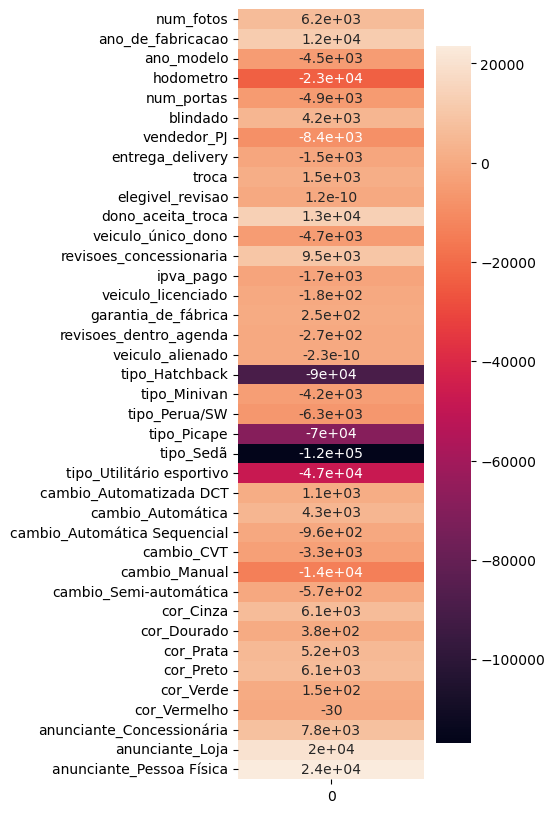

In [5]:
pipeline.fit(X, y)
plt.figure(figsize=(3, 10))
sns.heatmap(pd.DataFrame(data=[pipeline.named_steps['regressor'].coef_], columns=X.columns).T, annot=True)
plt.show()

In [6]:
df1 = pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante'], drop_first=True)
df1['marca'] = df1['marca'].astype('category').cat.codes
df1['modelo'] = df1['modelo'].astype('category').cat.codes
df1['versao'] = df1['versao'].astype('category').cat.codes
df1['estado_vendedor'] = df1['estado_vendedor'].astype('category').cat.codes
df1.drop(columns='cidade_vendedor', inplace=True)


# from sklearn.compose import ColumnTransformer

X = df1.drop(columns=['preco', 'id'])
y = df1.preco

cat_cols = X.select_dtypes('object').columns.tolist()
# encoder = OrdinalEncoder()
# encoder.fit_transform(X)

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('categorical', OrdinalEncoder(), cat_cols)
#     ]
# )

kfold = KFold(n_splits=5, random_state=31, shuffle=True)

pipeline = Pipeline([
    # ('encoder', OneHotEncoder(categories='auto', drop='first')),
    # ('encoder', LabelEncoder()),
    # ('encoder', OrdinalEncoder()),
    # ('preprocessor', preprocessor),
    # ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=31))
    # ('regressor', LinearRegression())
])

# from sklearn.model_selection import GridSearchCV
# grid_CV = GridSearchCV(pipeline, )

scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
print(scores)

[0.75459328 0.71582191 0.71679727 0.71852442 0.71470773]


Vamos realizar feature engineering para extrair informações presentes na coluna de versão do carro.

In [7]:
# df[~df.versao.str.slice(0,1).str.isdigit()]

In [8]:
# os 3 primeiros digitos referem-se as cilindradas do motor
# para os carros elétricos, que não tem essa identificação, o motor foi considerado como igual a 0

import re
df['motor'] = df.versao.str.slice(0, 3).apply(lambda x: float(x) if re.findall('^\d\.\d$', x) else 0.0)

In [9]:
# df[df['versao'].str.slice(0,3).str.match(r'^\d\.\d$')].sort_values('versao').versao.unique()

In [10]:
combustivel = df.versao.apply(lambda car: 'gasolina' if re.findall('GAS', car) else \
                ('flex' if re.findall('FLEX|TETRAFUEL', car) else \
                ('diesel' if re.findall('DIESEL', car) else \
                ('eletrico' if re.findall('ELETRI|ELÉTRI|ELECTRI|RECHARG', car) else \
                ('hibrido' if re.findall('HÍBRID|HYBRID|HIBRID', car) else \
                ('flex' if re.findall('1\.', car) else 'gasolina')))))) # carros da volkswagen que são flex
df['combustivel'] = combustivel

In [11]:
df['4x4'] = df.versao.str.contains('4X4')
df['turbo'] = df.versao.str.contains('TURBO')


In [12]:
display(
    df.groupby('motor').preco.mean(), 
    df.groupby('combustivel').preco.mean(), 
    df.groupby('4x4').preco.mean(), 
    df.groupby('turbo').preco.mean()
)

motor
0.0    246632.879083
0.6    220434.917144
1.0     79865.234668
1.2     49097.244958
1.3    125343.131239
1.4    100025.930860
1.5    108275.142917
1.6    104157.744987
1.7     38398.771642
1.8     91791.807639
1.9     97851.979700
2.0    150055.235390
2.1    156963.098196
2.2    168547.864874
2.3    160659.056177
2.4    113263.301018
2.5    169580.286712
2.7    152259.368243
2.8    231723.688385
2.9    339603.040687
3.0    222598.441463
3.2    198528.821737
3.3    137763.366471
3.5    121376.613455
3.6    164998.677979
3.7     42767.636222
3.8     94533.425051
3.9     71517.534806
4.0    309406.665867
4.1     49924.864046
4.2     99064.225438
4.3     58022.666181
4.4    214123.944767
4.5     57353.165471
4.6     73231.468807
4.7    126822.068318
4.8    108885.328867
4.9     72792.384420
5.0    286501.055520
5.2     62731.123316
5.5    140032.037259
5.7    190230.410261
5.9    125309.699880
6.2    201085.158129
6.7    321207.866029
Name: preco, dtype: float64

combustivel
diesel      196432.297513
eletrico    248486.768056
flex        100971.230204
gasolina    161622.128140
hibrido     244669.483136
Name: preco, dtype: float64

4x4
False    124345.131033
True     189395.069191
Name: preco, dtype: float64

turbo
False    122583.166268
True     166426.753422
Name: preco, dtype: float64

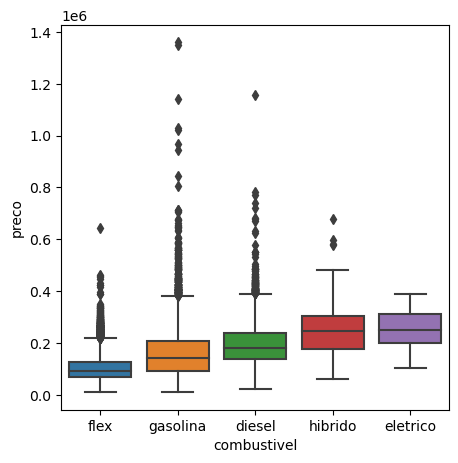

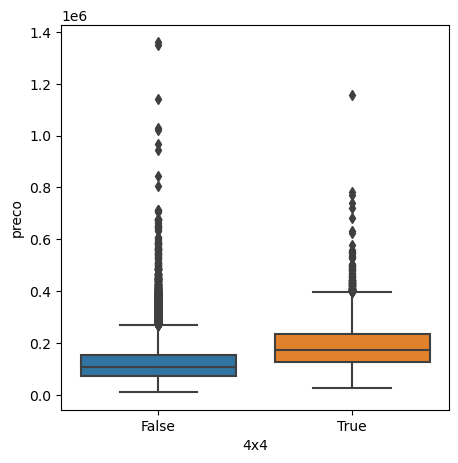

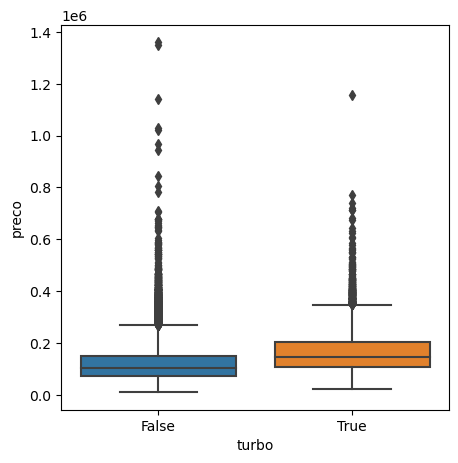

In [13]:
# plt.figure(figsize=(5, 10))
# sns.boxplot(df, y='motor', x='preco')
# plt.show()

colunas_novas_features = ['combustivel', '4x4', 'turbo']

for feature in colunas_novas_features:
    plt.figure(figsize=(5, 5))
    sns.boxplot(df, x=feature, y='preco')
    plt.show()

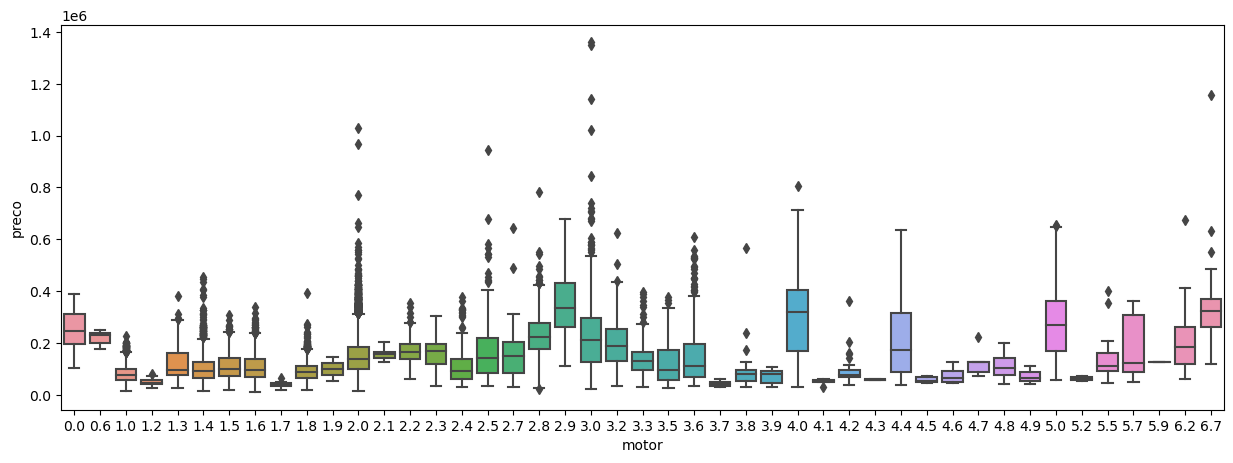

In [19]:
plt.figure(figsize=(15, 5))
sns.boxplot(df, x='motor', y='preco')
plt.show()

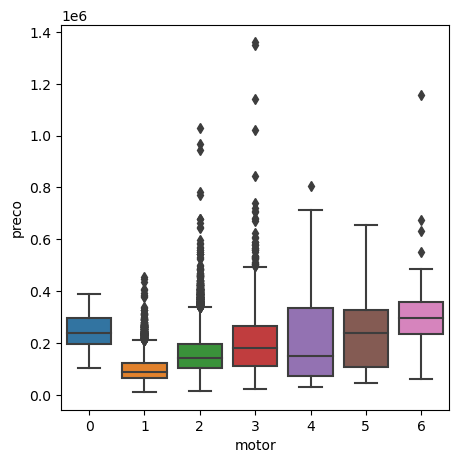

In [22]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['motor'].astype(int), y=df['preco'])
plt.show()

In [23]:
# Criando dummies e removendo a primeira para evitar problemas de colinearidade
df3 = pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante', 'combustivel'], drop_first=True)

X = df3.select_dtypes(np.number).drop(columns=['preco'])
y = df3.preco

kfold = KFold(n_splits=5, random_state=31, shuffle=True)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

print('Scores do CV (R2):', cross_val_score(pipeline, X, y, cv=kfold, scoring='r2'))
print('Média (R2):', cross_val_score(pipeline, X, y, cv=kfold, scoring='r2').mean().round(2))
print('Scores do CV (RMSE):', cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error'))
print('Média (RMSE):', cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error').mean().round(2))

Scores do CV (R2): [0.58482737 0.5424901  0.56287125 0.55112484 0.54776591]
Média (R2): 0.56
Scores do CV (RMSE): [-51429.79148195 -59163.01735154 -52102.02073997 -54297.76173692
 -54362.6392777 ]
Média (RMSE): -54271.05


In [31]:
pipeline.fit(X, y)
{feat: value for feat, value in zip(X.columns, pipeline.named_steps['regressor'].coef_)}

{'num_fotos': 5118.006869550553,
 'ano_de_fabricacao': 16606.923329654175,
 'ano_modelo': 5260.619527352383,
 'hodometro': -18610.360750127198,
 'num_portas': -5300.286311395245,
 'blindado': 2773.190143227662,
 'vendedor_PJ': -3590.7719610194886,
 'entrega_delivery': -712.4823036709374,
 'troca': 1368.1685070450642,
 'elegivel_revisao': -2.0372681319713593e-10,
 'dono_aceita_troca': 6825.513325630748,
 'veiculo_único_dono': -2795.7030447359903,
 'revisoes_concessionaria': 5127.124976273811,
 'ipva_pago': -1114.6095828089317,
 'veiculo_licenciado': -147.78721712166382,
 'garantia_de_fábrica': -1582.78426290514,
 'revisoes_dentro_agenda': 282.32805989048666,
 'veiculo_alienado': -9.458744898438454e-11,
 'motor': 21731.22713163853,
 'tipo_Hatchback': -66430.1244147775,
 'tipo_Minivan': -2887.50350352482,
 'tipo_Perua/SW': -4614.735350427939,
 'tipo_Picape': -59566.58202380931,
 'tipo_Sedã': -87889.99467358751,
 'tipo_Utilitário esportivo': -38217.26643146257,
 'cambio_Automatizada DCT': 

In [33]:
# df4 = pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante'], drop_first=True)
# df4 = pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante', 'combustivel'], drop_first=True)
df4 = df.copy()
df4['tipo'] = df4['tipo'].astype('category').cat.codes
df4['cambio'] = df4['cambio'].astype('category').cat.codes
df4['cor'] = df4['cor'].astype('category').cat.codes
df4['anunciante'] = df4['anunciante'].astype('category').cat.codes
df4['combustivel'] = df4['combustivel'].astype('category').cat.codes
df4['marca'] = df4['marca'].astype('category').cat.codes
df4['modelo'] = df4['modelo'].astype('category').cat.codes
df4['versao'] = df4['versao'].astype('category').cat.codes
df4['estado_vendedor'] = df4['estado_vendedor'].astype('category').cat.codes
df4.drop(columns='cidade_vendedor', inplace=True)


# from sklearn.compose import ColumnTransformer

X = df4.drop(columns=['preco', 'id'])
y = df4.preco

cat_cols = X.select_dtypes('object').columns.tolist()
# encoder = OrdinalEncoder()
# encoder.fit_transform(X)

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('categorical', OrdinalEncoder(), cat_cols)
#     ]
# )

kfold = KFold(n_splits=5, random_state=31, shuffle=True)

pipeline = Pipeline([
    # ('encoder', OneHotEncoder(categories='auto', drop='first')),
    # ('encoder', LabelEncoder()),
    # ('encoder', OrdinalEncoder()),
    # ('preprocessor', preprocessor),
    # ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=31))
    # ('regressor', LinearRegression())
])

# from sklearn.model_selection import GridSearchCV
# grid_CV = GridSearchCV(pipeline, )

scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
print(scores)

[0.76154316 0.71519639 0.71909468 0.72331281 0.71503819]


In [34]:
# df5 = pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante'], drop_first=True)
# df5 = pd.get_dummies(df, columns=['tipo', 'cambio', 'cor', 'anunciante', 'combustivel'], drop_first=True)
df5 = df.copy()
df5['tipo'] = df5['tipo'].astype('category').cat.codes
df5['cambio'] = df5['cambio'].astype('category').cat.codes
df5['cor'] = df5['cor'].astype('category').cat.codes
df5['anunciante'] = df5['anunciante'].astype('category').cat.codes
df5['combustivel'] = df5['combustivel'].astype('category').cat.codes
df5['marca'] = df5['marca'].astype('category').cat.codes
df5['modelo'] = df5['modelo'].astype('category').cat.codes
# df5['versao'] = df5['versao'].astype('category').cat.codes
df5.drop(columns='versao', inplace=True)
df5['estado_vendedor'] = df5['estado_vendedor'].astype('category').cat.codes
df5.drop(columns='cidade_vendedor', inplace=True)


# from sklearn.compose import ColumnTransformer

X = df5.drop(columns=['preco', 'id'])
y = df5.preco

cat_cols = X.select_dtypes('object').columns.tolist()
# encoder = OrdinalEncoder()
# encoder.fit_transform(X)

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('categorical', OrdinalEncoder(), cat_cols)
#     ]
# )

kfold = KFold(n_splits=5, random_state=31, shuffle=True)

pipeline = Pipeline([
    # ('encoder', OneHotEncoder(categories='auto', drop='first')),
    # ('encoder', LabelEncoder()),
    # ('encoder', OrdinalEncoder()),
    # ('preprocessor', preprocessor),
    # ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=31))
    # ('regressor', LinearRegression())
])

# from sklearn.model_selection import GridSearchCV
# grid_CV = GridSearchCV(pipeline, )

scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
print(scores)

[0.75645968 0.70839124 0.71164823 0.71455082 0.70895747]


In [38]:
cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error')

array([-39389.98705   , -47233.52419855, -42316.64137099, -43299.5658275 ,
       -43611.107147  ])

In [41]:
y_pred = pipeline.fit(X, y).predict(X)

<Axes: ylabel='preco'>

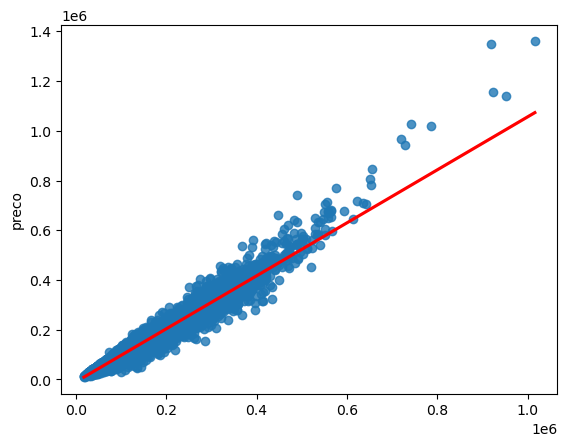

In [43]:
sns.regplot(x=y_pred, y=y, line_kws={'color': 'red'})

In [15]:
# df[df.versao.str.contains('ELETRI|ELÉTRI|ELECTRI')].sort_values('versao').versao.unique()

In [16]:
# df[df.versao.str.contains('ELET|ELÉT|ELEC')].sort_values('versao').versao.unique()

In [17]:
# df[(df.versao.str.contains('HATCH'))]

In [18]:
X.select_dtypes('object').columns.tolist()

[]